In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

train = pd.read_csv('data/train.csv')
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


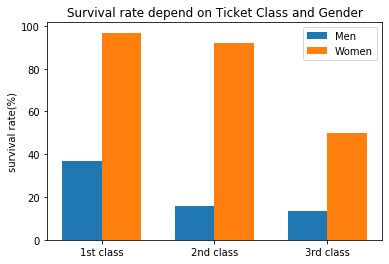

In [15]:
#1등석 남/여 생존률 계산
survived_male_1st = train.loc[(train['Sex'] == 'male') & (train['Survived'] == 1) & (train['Pclass'] == 1), 'PassengerId'].count()
survived_female_1st = train.loc[(train['Sex'] == 'female') & (train['Survived'] == 1) & (train['Pclass'] == 1), 'PassengerId'].count()
dead_male_1st = train.loc[(train['Sex'] == 'male') & (train['Survived'] == 0) & (train['Pclass'] == 1), 'PassengerId'].count()
dead_female_1st = train.loc[(train['Sex'] == 'female') & (train['Survived'] == 0) & (train['Pclass'] == 1), 'PassengerId'].count()

df_1st = pd.DataFrame({ 'male': [dead_male_1st, survived_male_1st], 'female': [dead_female_1st, survived_female_1st] })
pc_male_1st = (survived_male_1st)/(survived_male_1st + dead_male_1st) *100
pc_female_1st = (survived_female_1st)/(survived_female_1st + dead_female_1st) *100


#2등석 남/여 생존률 계산
survived_male_2nd = train.loc[(train['Sex'] == 'male') & (train['Survived'] == 1)&(train['Pclass'] == 2), 'PassengerId'].count()
survived_female_2nd = train.loc[(train['Sex'] == 'female') & (train['Survived'] == 1)&(train['Pclass'] == 2), 'PassengerId'].count()
dead_male_2nd = train.loc[(train['Sex'] == 'male') & (train['Survived'] == 0)&(train['Pclass'] == 2), 'PassengerId'].count()
dead_female_2nd = train.loc[(train['Sex'] == 'female') & (train['Survived'] == 0)&(train['Pclass'] == 2), 'PassengerId'].count()

df_2nd = pd.DataFrame({ 'male': [dead_male_2nd, survived_male_2nd], 'female': [dead_female_2nd, survived_female_2nd] })
pc_male_2nd = (survived_male_2nd)/(survived_male_2nd + dead_male_2nd) *100
pc_female_2nd = (survived_female_2nd)/(survived_female_2nd + dead_female_2nd) *100


#3등석 남/여 생존률 계산
survived_male_3rd = train.loc[(train['Sex'] == 'male') & (train['Survived'] == 1)&(train['Pclass'] == 3), 'PassengerId'].count()
survived_female_3rd = train.loc[(train['Sex'] == 'female') & (train['Survived'] == 1)&(train['Pclass'] == 3), 'PassengerId'].count()
dead_male_3rd = train.loc[(train['Sex'] == 'male') & (train['Survived'] == 0)&(train['Pclass'] == 3), 'PassengerId'].count()
dead_female_3rd = train.loc[(train['Sex'] == 'female') & (train['Survived'] == 0)&(train['Pclass'] == 3), 'PassengerId'].count()

df_3rd = pd.DataFrame({ 'male': [dead_male_3rd, survived_male_3rd], 'female': [dead_female_3rd, survived_female_3rd] })
pc_male_3rd = (survived_male_3rd)/(survived_male_3rd + dead_male_3rd)*100
pc_female_3rd = (survived_female_3rd)/(survived_female_3rd + dead_female_3rd) *100


#Pclass에 따른 남/여 리스트 생성
pc_male = [pc_male_1st, pc_male_2nd, pc_male_3rd]
pc_female = [pc_female_1st, pc_female_2nd, pc_female_3rd]

labels = ['1st class', '2nd class', '3rd class']
x = np.arange(len(labels))  # the label locations
width = 0.35 


###########plot그리기################

#fig, ax = plt.subplots()  이용    -> 한번에 여러 그래프를 보여주기 위한 코드

#subplots()에선 두개의 값을 받을 수 있는데 figure 와 axes 값을 받을 수 있다. 여기서 변수명은 상관없다. 순서가 중요하다
#fig란 figure로써 전체 subplot을 말한다. ex) subplot으로 몇개의 그래프가 있던지 상관없이 그걸 담는 하나. 전체 사이즈.
#ax는 axe로써 전체 중 낱낱개를 말한다 ex) subplot 안에 2개(a1,a2)의 그래프가 있다면 a1, a2 각각을 의미한다. (지금 상황에선 3개)

#matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
#.bar에 대해선, https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar 참고

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, pc_male, width, label='Men')
rects2 = ax.bar(x + width/2, pc_female, width, label='Women')


#라벨 및 제목 지정
ax.set_ylabel('survival rate(%)')
ax.set_title('Survival rate depend on Ticket Class and Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()